In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [111]:
plt.rcParams["figure.figsize"] = 10,7
plt.rcParams["font.size"] = 15

Downloading OpenStreetMap dataset for Hungary from GeoFabrik.

In [ ]:
# !wget https://download.geofabrik.de/europe/hungary-latest-free.shp.zip
# !mv hungary-latest-free.shp.zip ../data
# !mkdir ../data/hungary-osm
# !unzip ../data/hungary-latest-free.shp.zip -d ../data/hungary-osm

Downloading administrative boundaries of Hungary for later visualization purposes.

In [ ]:
# !wget https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_HUN_shp.zip
# !mv gadm36_HUN_shp.zip ../data
# !mkdir ../data/hungary-gadm
# !unzip ../data/gadm36_HUN_shp.zip -d ../data/hungary-gadm

Largest Hungarian settlements according to OSM - 1 is missing!

In [55]:
settlements = gpd.read_file('../data/hungary-osm/gis_osm_places_free_1.shp',encoding='utf8')
settlements[settlements["fclass"] == "city"].reset_index(drop=True)

,osm_id,code,fclass,population,name,geometry
0,17550787,1001,city,140237,Pécs,POINT (18.22804 46.07659)
1,25553427,1001,city,30963,Szekszárd,POINT (18.70166 46.34849)
2,25926749,1001,city,59777,Kaposvár,POINT (17.78869 46.35647)
3,26757722,1001,city,51168,Eger,POINT (20.37437 47.89899)
4,26757724,1001,city,200974,Debrecen,POINT (21.62598 47.53140)
5,30453579,1001,city,159074,Szeged,POINT (20.14860 46.25463)
6,32443002,1001,city,109651,Kecskemét,POINT (19.69281 46.90808)
7,32444521,1001,city,58002,Békéscsaba,POINT (21.09854 46.67980)
8,64622559,1001,city,150695,Miskolc,POINT (20.79004 48.10306)
9,64624269,1001,city,132735,Győr,POINT (17.63468 47.68761)


In [56]:
settlements["name_norm"] = settlements["name"]\
    .str.strip()\
    .str.normalize('NFD')\
    .str.encode('ascii', 'ignore')\
    .str.decode("utf-8")

In [57]:
# list of largest cities
large_cities = set(settlements[settlements["fclass"] == "city"]["name_norm"]).union(set(["Budapest"]))

Getting the top 20 settlements from the social network (iwiw) data.

In [54]:
settlements_iwiw = pd.read_csv('../data/cities_final.csv',encoding='utf8')
settlements_iwiw[settlements_iwiw['CityName'].map(lambda s: s in large_cities)].reset_index(drop=True)

,CityId,CityName,Latitude,Longitude,PopLog
0,379,Budapest,47.498382,19.040471,6.240560
1,380,Debrecen,47.531399,21.625978,5.317215
2,381,Miskolc,48.103150,20.790198,5.222256
3,382,Szeged,46.254631,20.148602,5.230582
4,383,Pecs,46.076322,18.228075,5.195349
5,384,Gyor,47.687609,17.634681,5.119137
6,385,Nyiregyhaza,47.955780,21.716798,5.070621
7,386,Kecskemet,46.908077,19.692813,5.057765
8,387,Szekesfehervar,47.191017,18.410811,5.007415
9,388,Szombathely,47.229118,16.618762,4.899536


Identifiers of settlements in the social network dataset.

In [71]:
iwiw_codes = settlements_iwiw[settlements_iwiw['CityName'].map(lambda s: s in large_cities)]['CityId'].tolist()
iwiw_codes_dict = dict(zip(*settlements_iwiw[settlements_iwiw['CityName'].map(lambda s: s in large_cities)][['CityId',"CityName"]].T.values))

In [73]:
iwiw_codes

[379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 396,
 1842,
 2103]

In [72]:
iwiw_codes_dict

{379: 'Budapest',
 380: 'Debrecen',
 381: 'Miskolc',
 382: 'Szeged',
 383: 'Pecs',
 384: 'Gyor',
 385: 'Nyiregyhaza',
 386: 'Kecskemet',
 387: 'Szekesfehervar',
 388: 'Szombathely',
 389: 'Szolnok',
 390: 'Tatabanya',
 391: 'Kaposvar',
 392: 'Bekescsaba',
 393: 'Zalaegerszeg',
 394: 'Veszprem',
 396: 'Eger',
 1842: 'Szekszard',
 2103: 'Salgotarjan'}

Invitation counts for each year between cities.

In [60]:
invitations_iwiw = pd.read_csv('../data/invitation_counts.csv.gz')
invitations_iwiw.head()

,RegYear,CityId,InvitorCityId,w
0,2002,379,379,3809
1,2002,379,380,6
2,2002,379,381,7
3,2002,379,382,8
4,2002,379,383,12


In [103]:
mask1 = invitations_iwiw["CityId"].map(lambda i: i in iwiw_codes)
mask2 = invitations_iwiw["InvitorCityId"].map(lambda i: i in iwiw_codes)
mask3 = invitations_iwiw["InvitorCityId"]!=invitations_iwiw["CityId"]

In [75]:
invitations_iwiw[invitations_iwiw["RegYear"]==2006][mask1&mask2]\
    .pivot_table(index="CityId",columns="InvitorCityId",values="w")\
    .rename(columns = iwiw_codes_dict, index = iwiw_codes_dict)\
    .fillna(0)

<ipython-input-75-badc94252b44>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invitations_iwiw[invitations_iwiw["RegYear"]==2006][mask1&mask2]\


InvitorCityId,Budapest,Debrecen,Miskolc,Szeged,Pecs,Gyor,Nyiregyhaza,Kecskemet,Szekesfehervar,Szombathely,Szolnok,Tatabanya,Kaposvar,Bekescsaba,Zalaegerszeg,Veszprem,Eger,Szekszard,Salgotarjan
CityId,,,,,,,,,,,,,,,,,,,
Budapest,139840.0,1482.0,821.0,1814.0,1451.0,1064.0,785.0,481.0,688.0,374.0,326.0,308.0,334.0,231.0,437.0,497.0,471.0,168.0,164.0
Debrecen,2488.0,9598.0,148.0,138.0,77.0,61.0,394.0,36.0,32.0,15.0,62.0,13.0,9.0,15.0,16.0,19.0,85.0,5.0,16.0
Miskolc,2080.0,291.0,4801.0,104.0,62.0,66.0,165.0,27.0,49.0,20.0,23.0,18.0,14.0,12.0,9.0,25.0,95.0,4.0,8.0
Szeged,2151.0,102.0,32.0,12127.0,127.0,80.0,34.0,144.0,58.0,26.0,49.0,7.0,19.0,84.0,16.0,32.0,34.0,17.0,8.0
Pecs,1542.0,37.0,10.0,89.0,9415.0,89.0,16.0,21.0,70.0,48.0,9.0,14.0,91.0,4.0,63.0,39.0,6.0,67.0,1.0
Gyor,1600.0,43.0,24.0,67.0,93.0,7637.0,24.0,23.0,61.0,69.0,12.0,50.0,26.0,12.0,35.0,70.0,20.0,7.0,2.0
Nyiregyhaza,1430.0,444.0,90.0,82.0,26.0,33.0,5129.0,12.0,18.0,6.0,19.0,10.0,7.0,10.0,6.0,6.0,15.0,4.0,2.0
Kecskemet,1421.0,53.0,11.0,303.0,76.0,37.0,22.0,3620.0,27.0,8.0,40.0,11.0,16.0,10.0,10.0,16.0,20.0,6.0,3.0
Szekesfehervar,1517.0,51.0,28.0,83.0,145.0,124.0,25.0,27.0,4675.0,24.0,12.0,26.0,38.0,7.0,28.0,102.0,14.0,20.0,5.0


In [104]:
invitations_iwiw_subset = invitations_iwiw[mask1&mask2&mask3]

In [105]:
invitation_timelines = invitations_iwiw_subset.pivot_table(index=["CityId","InvitorCityId"],columns="RegYear",values="w").fillna(0)
invitation_timelines

RegYear               2002  2003  2004   2005    2006   2007   2008   2009  \
CityId InvitorCityId                                                         
379    380             6.0  19.0  38.0  195.0  1482.0  870.0  398.0  299.0   
       381             7.0  26.0  13.0  167.0   821.0  624.0  292.0  198.0   
       382             8.0  23.0  39.0  339.0  1814.0  731.0  317.0  211.0   
       383            12.0  45.0  60.0  346.0  1451.0  542.0  302.0  232.0   
       384             9.0  27.0  33.0  251.0  1064.0  480.0  252.0  217.0   
...                    ...   ...   ...    ...     ...    ...    ...    ...   
2103   392             0.0   0.0   0.0    0.0     5.0    8.0    2.0    3.0   
       393             0.0   0.0   0.0    0.0     3.0    6.0    3.0    3.0   
       394             0.0   0.0   0.0    0.0     4.0    5.0    4.0    2.0   
       396             0.0   0.0   0.0    3.0    22.0   37.0   19.0   14.0   
       1842            0.0   0.0   0.0    0.0     1.0    2.0    1.0    1.0   

RegYear                2010  2011  2012  
CityId InvitorCityId                     
379    380            200.0  48.0   4.0  
       381            176.0  39.0   2.0  
       382            173.0  34.0   2.0  
       383            208.0  37.0   0.0  
       384            133.0  32.0   2.0  
...                     ...   ...   ...  
2103   392              1.0   0.0   0.0  
       393              3.0   0.0   0.0  
       394              1.0   0.0   0.0  
       396              5.0   0.0   0.0  
       1842             3.0   0.0   0.0  

[342 rows x 11 columns]

In [106]:
invitation_timelines["total"] = invitation_timelines.sum(axis=1)

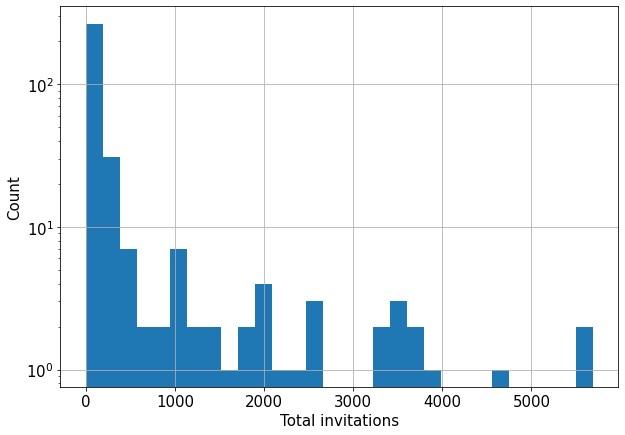

In [113]:
plt.hist(invitation_timelines["total"],bins=30)
plt.semilogy()
plt.xlabel("Total invitations")
plt.ylabel("Count")
plt.grid()
plt.show()

In [108]:
(invitation_timelines["total"]>500).sum()

41

Timeline of invitations sent for the strongest connections.

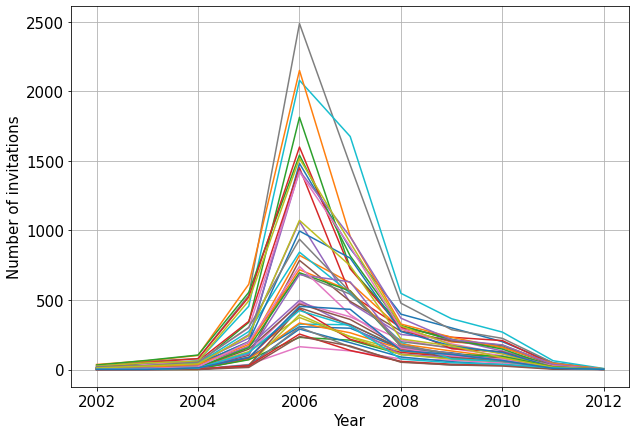

In [115]:
invitation_timelines[invitation_timelines["total"]>500].drop(columns=["total"]).T.plot(legend=False)
plt.xlabel("Year")
plt.ylabel("Number of invitations")
plt.grid()
plt.show()

Normalizing by total number of invitations on the given link.

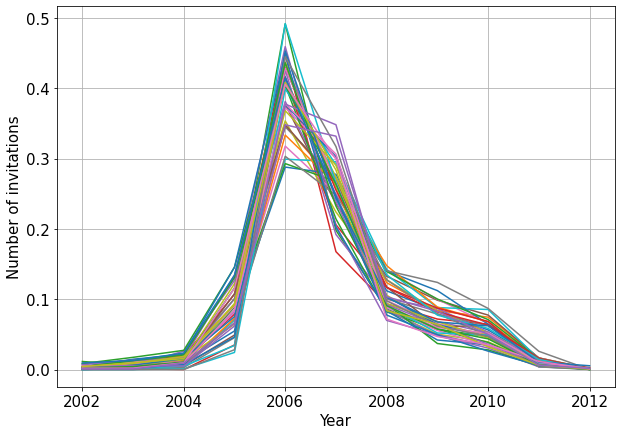

In [119]:
(invitation_timelines[invitation_timelines["total"]>500].drop(columns=["total"]).T/invitation_timelines["total"]).plot(legend=False)
plt.xlabel("Year")
plt.ylabel("Number of invitations")
plt.grid()
plt.show()